In [1]:
!nvidia-smi

Sat Apr 22 16:12:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  Off  | 00000000:21:00.0 Off |                    0 |
| N/A   21C    P0    37W / 250W |  30047MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import time
import torch
import gym
import matplotlib.pyplot as plt

from DQN import neural_net, DQN, lr, MEMORY_SIZE
from atari_wrappers import modify_env
from replay_memory import ReplayMemory

def env_test_render(env):
    # run random policy and render
    env.reset()
    for _ in range(1000):
        fig = plt.figure()
        arr = env.render(mode='rgb_array')
        plt.imshow(arr)
        plt.show()
        env.step(env.action_space.sample())
    env.close()
    return

# create environment
DEFAULT_ENV_NAME = "PongNoFrameskip-v4"
env = gym.make(DEFAULT_ENV_NAME)
env = modify_env(env)
# env_test_render(env)

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create networks
policy_net = neural_net(n_actions=4).to(device)
target_net = neural_net(n_actions=4).to(device)
target_net.load_state_dict(policy_net.state_dict())

# setup optimizer
optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

# initialize replay memory
memory = ReplayMemory(MEMORY_SIZE)

# train model
model = DQN(policy_net, target_net, optimizer, memory, device, n_actions=4)
model.train(env, 400)
torch.save(model.policy_net, "dqn_pong_model")

# test model
policy_net = torch.load("dqn_pong_model")
model.test(env, 1, policy_net, render=False)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


Total steps: 1123 	 Episode: 0/1122 	 Total reward: -21.0
Total steps: 2108 	 Episode: 1/984 	 Total reward: -21.0
Total steps: 2868 	 Episode: 2/759 	 Total reward: -21.0
Total steps: 3689 	 Episode: 3/820 	 Total reward: -21.0
Total steps: 4534 	 Episode: 4/844 	 Total reward: -21.0
Total steps: 5565 	 Episode: 5/1030 	 Total reward: -20.0
Total steps: 6412 	 Episode: 6/846 	 Total reward: -21.0
Total steps: 7325 	 Episode: 7/912 	 Total reward: -20.0
Total steps: 8218 	 Episode: 8/892 	 Total reward: -20.0
Total steps: 9066 	 Episode: 9/847 	 Total reward: -21.0
Total steps: 9945 	 Episode: 10/878 	 Total reward: -21.0
Total steps: 10764 	 Episode: 11/818 	 Total reward: -21.0
Total steps: 11983 	 Episode: 12/1218 	 Total reward: -20.0
Total steps: 12898 	 Episode: 13/914 	 Total reward: -21.0


KeyboardInterrupt: 

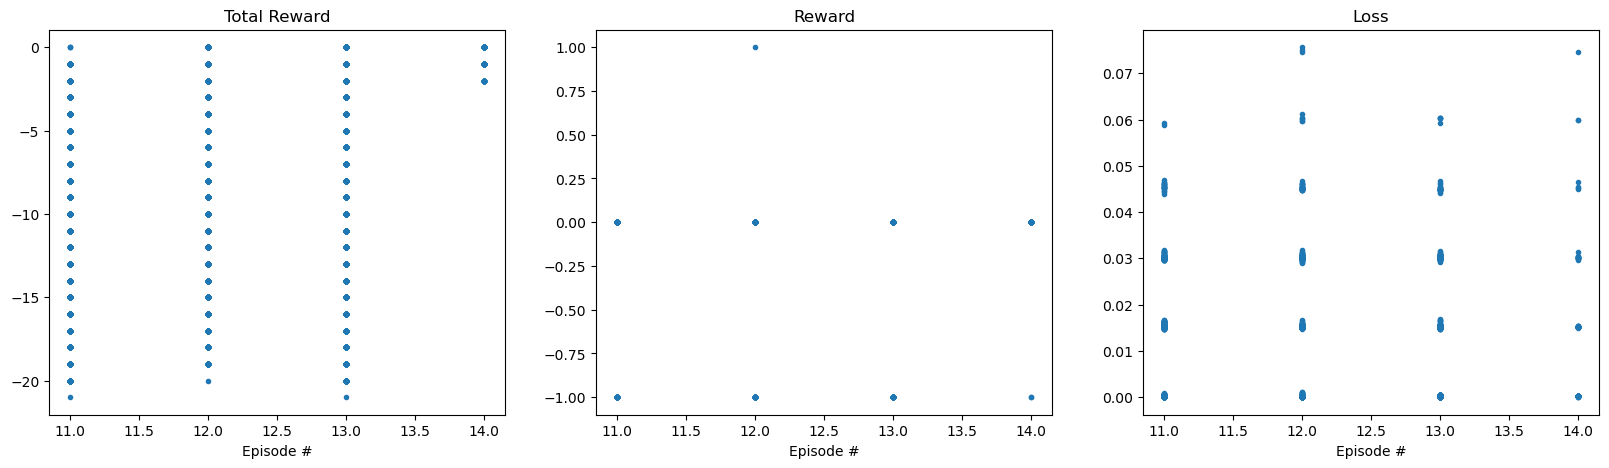

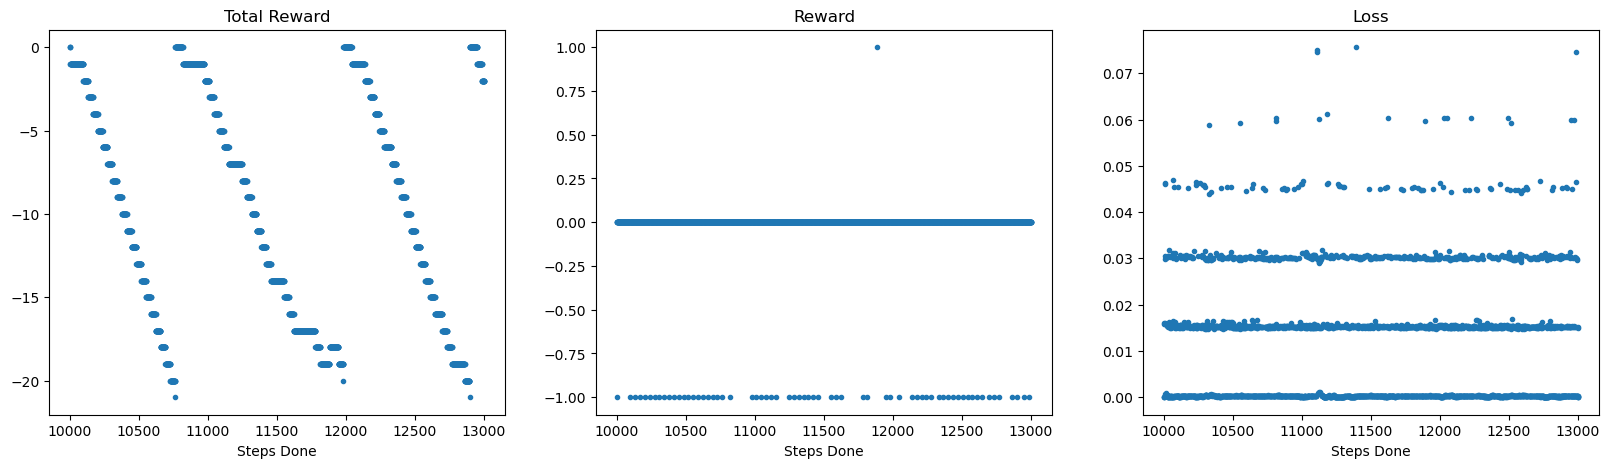

In [3]:
model.plot()